# Tugas Besar Machine Learning (Tahap 2)
---
1. Nama : Izzan Faikar Ramadhy
<br>NIM : 1301184216
<br>Kelas : IF-42-12

2. Nama : Reza Ahmad Yahya
<br>NIM : 1301184403
<br>Kelas : IF-42-12

## Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import io
import requests
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
%config IPCompleter.greedy=True

mpl.style.use(['ggplot']) 

## Load Data

In [3]:
# Load data training salju
url = "https://raw.githubusercontent.com/RezaAYahya/Classification/main/salju_train.csv"
download = requests.get(url).content

df_train = pd.read_csv(io.StringIO(download.decode('utf-8')))
df_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [4]:
# Load data testing salju
url2 = "https://raw.githubusercontent.com/RezaAYahya/Classification/main/salju_test.csv"
download2 = requests.get(url2).content

df_test = pd.read_csv(io.StringIO(download2.decode('utf-8')))
df_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,...,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,...,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,...,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


## Eksplorasi Data
1. Identifikasi Data <br>
    a. Dimensi Data <br>
    b. Info Data <br>
    c. Missing Values <br>
2. Univariate Analysis (Explore Kolom Target)
3. Bivariate Analysis
4. Multivariate Analysis

### Identifikasi Data

#### Dimensi Data

In [5]:
# Melihat jumlah baris dan kolom data train salju
df_train.shape

(109095, 24)

In [6]:
# Melihat jumlah baris dan kolom data test salju
df_test.shape

(18182, 23)

#### Info Data

In [7]:
# Melihat informasi dari data train salju
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [8]:
# Melihat informasi dari data test salju
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   18182 non-null  object 
 1   KodeLokasi                18182 non-null  object 
 2   SuhuMin                   18017 non-null  float64
 3   SuhuMax                   18017 non-null  float64
 4   Hujan                     17795 non-null  float64
 5   Penguapan                 10326 non-null  float64
 6   SinarMatahari             9464 non-null   float64
 7   ArahAnginTerkencang       16901 non-null  object 
 8   KecepatanAnginTerkencang  16908 non-null  float64
 9   ArahAngin9am              16874 non-null  object 
 10  ArahAngin3pm              17686 non-null  object 
 11  KecepatanAngin9am         17984 non-null  float64
 12  KecepatanAngin3pm         17828 non-null  float64
 13  Kelembaban9am             17852 non-null  float64
 14  Kelemb

#### Missing Values

In [9]:
# Mengecheck nilai null dari data train salju
df_train.isnull().sum()

id                              0
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64

In [10]:
df_test.isnull().sum()

Tanggal                        0
KodeLokasi                     0
SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
ArahAnginTerkencang         1281
KecepatanAnginTerkencang    1274
ArahAngin9am                1308
ArahAngin3pm                 496
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuHariIni              387
BersaljuBesok                419
dtype: int64

### Univariate Analysis
> Explore kolom target (BersaljuBesok)
1. Check Missing Values
2. Check Unique Values
3. Check Distribusi Data

#### Missing Values

In [11]:
df_train['BersaljuBesok'].isnull().sum()

2431

Terdapat 2431 missing values pada data train.

In [28]:
df_test['BersaljuBesok'].isnull().sum()

419

Terdapat 419 missing values pada data test.

#### Unique Values

In [12]:
df_train['BersaljuBesok'].unique()

array(['Tidak', 'Ya', nan], dtype=object)

In [30]:
df_test['BersaljuBesok'].unique()

array(['No', 'Yes', nan], dtype=object)

Data class pada training dan testing masih belum konsisten nilainya, pada data train nilainya adalah 'Tidak' dan 'Ya' sedangkan pada data test nilainya adalah 'No' dan 'Yes'.

#### Distribusi Data

In [13]:
df_train['BersaljuBesok'].value_counts()

Tidak    82701
Ya       23963
Name: BersaljuBesok, dtype: int64

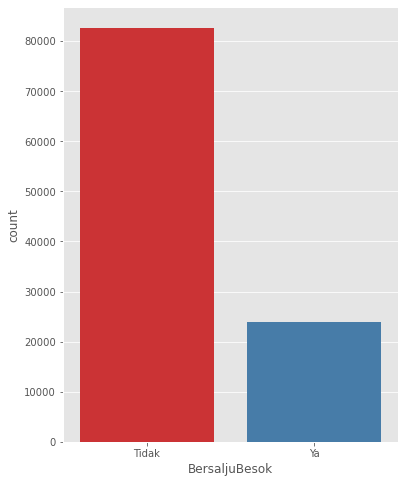

In [14]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="BersaljuBesok", data=df_train, palette="Set1")
plt.show()

Kolom target pada data training masih imbalance.

### Bivariate Analysis
1. Datetime
2. Categorical
3. Numerical

In [15]:
# Melihat tipe data dari data train salju
df_train.dtypes

id                            int64
Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

In [16]:
# Melihat tipe data dari data train salju
df_test.dtypes

Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

#### Datetime

In [17]:
# Merubah type data tanggal menjadi date
df_train['Tanggal'] = pd.to_datetime(df_train['Tanggal'])
df_test['Tanggal'] = pd.to_datetime(df_test['Tanggal'])

#### Categorical

In [18]:
# Melihat data yang bertipe kategorical di data train salju
categorical = [var for var in df_train.columns if df_train[var].dtype=='O']
print('Terdapat {} categorical variables di data train salju\n'.format(len(categorical)))
print('Contohnya adalah :', categorical)

Terdapat 6 categorical variables di data train salju

Contohnya adalah : ['KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm', 'BersaljuHariIni', 'BersaljuBesok']


In [19]:
# Melihat data yang bertipe kategorical di data test salju
categorical = [var for var in df_test.columns if df_test[var].dtype=='O']
print('Terdapat {} categorical variables di data test salju\n'.format(len(categorical)))
print('Contohnya adalah :', categorical)

Terdapat 6 categorical variables di data test salju

Contohnya adalah : ['KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm', 'BersaljuHariIni', 'BersaljuBesok']


#### Numerical

In [20]:
# Melihat data yang bertipe numerical di data train salju
numerical = [var for var in df_train.columns if df_train[var].dtype!='O']
print('Terdapat {} numerical variables di data train salju\n'.format(len(numerical)))
print('Contohnya adalah :', numerical)

Terdapat 18 numerical variables di data train salju

Contohnya adalah : ['id', 'Tanggal', 'SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm']


In [21]:
# Melihat data yang bertipe numerical di data test salju
numerical = [var for var in df_test.columns if df_test[var].dtype!='O']
print('Terdapat {} numerical variables di data test salju\n'.format(len(numerical)))
print('Contohnya adalah :', numerical)

Terdapat 17 numerical variables di data test salju

Contohnya adalah : ['Tanggal', 'SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm']


### Multivariate Analysis

In [22]:
korelasi = df_train.select_dtypes(include = ['float64']).iloc[:, :].corr()
korelasi

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
SuhuMin,1.000000,0.735500,0.104391,0.465508,0.072501,0.177627,0.174358,0.174122,-0.232101,0.007974,-0.449684,-0.459596,0.077349,0.021105,0.901208,0.707578
SuhuMax,0.735500,1.000000,-0.074669,0.585475,0.470991,0.068244,0.013632,0.050793,-0.504014,-0.507921,-0.331431,-0.426012,-0.291573,-0.279039,0.886984,0.984434
Hujan,0.104391,-0.074669,1.000000,-0.058940,-0.226845,0.135081,0.087157,0.059562,0.223661,0.254898,-0.168638,-0.127506,0.195540,0.170791,0.011781,-0.079160
Penguapan,0.465508,0.585475,-0.058940,1.000000,0.364745,0.198965,0.188950,0.128217,-0.499698,-0.387161,-0.268648,-0.291740,-0.181615,-0.181563,0.542808,0.570758
SinarMatahari,0.072501,0.470991,-0.226845,0.364745,1.000000,-0.035040,0.002004,0.051812,-0.489242,-0.627920,0.041321,-0.020052,-0.676965,-0.703482,0.291601,0.490993
KecepatanAnginTerkencang,0.177627,0.068244,0.135081,0.198965,-0.035040,1.000000,0.604677,0.686629,-0.214062,-0.026049,-0.460665,-0.415953,0.071323,0.105835,0.150043,0.033001
KecepatanAngin9am,0.174358,0.013632,0.087157,0.188950,0.002004,0.604677,1.000000,0.518093,-0.272566,-0.032366,-0.229197,-0.176461,0.024425,0.051593,0.127675,0.004132
KecepatanAngin3pm,0.174122,0.050793,0.059562,0.128217,0.051812,0.686629,0.518093,1.000000,-0.144640,0.016263,-0.298189,-0.257869,0.050446,0.023239,0.162047,0.027859
Kelembaban9am,-0.232101,-0.504014,0.223661,-0.499698,-0.489242,-0.214062,-0.272566,-0.144640,1.000000,0.667101,0.138628,0.185534,0.452897,0.356101,-0.471206,-0.498840
Kelembaban3pm,0.007974,-0.507921,0.254898,-0.387161,-0.627920,-0.026049,-0.032366,0.016263,0.667101,1.000000,-0.028295,0.050983,0.517553,0.523358,-0.219775,-0.557240


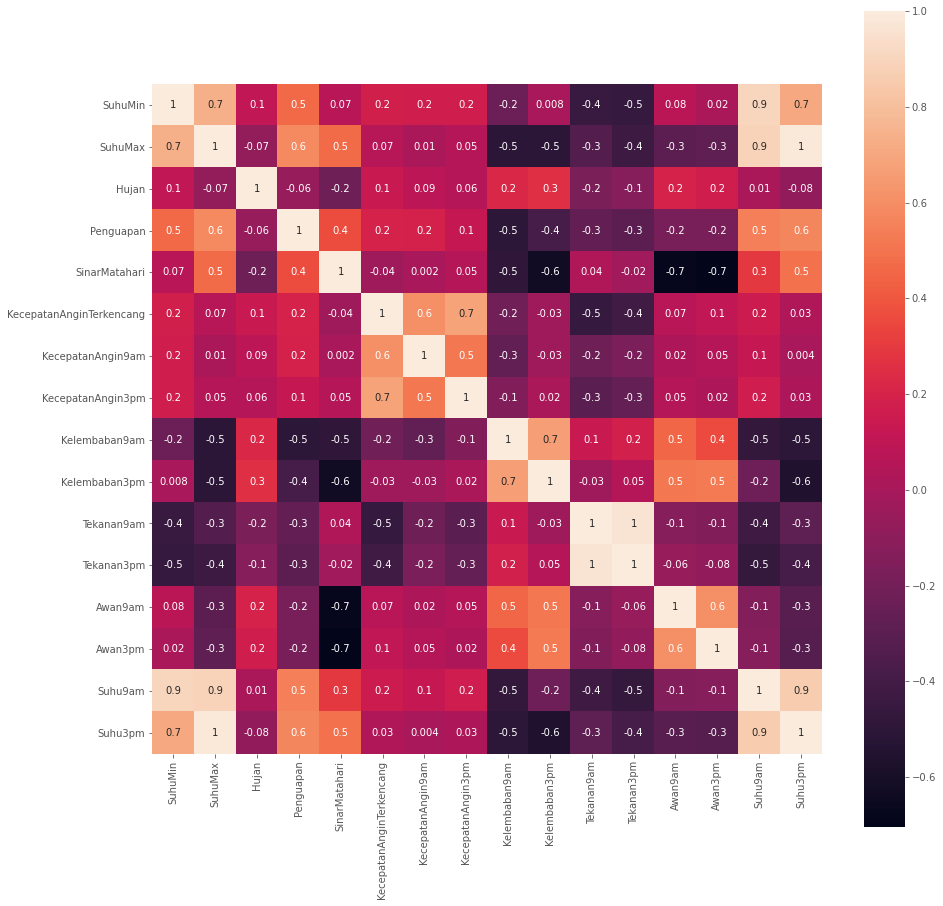

In [23]:
# Visualisasi korelasi
plt.figure(figsize=(15, 15))
sns.heatmap(korelasi, vmax=1, square=True, fmt='.1g', annot=True)
plt.show()

## Preprocessing
1. Handling Class Imbalance

### Handling Class Imbalance

In [24]:
df_train['BersaljuHariIni'].replace({'Tidak': 0, 'Ya': 1},inplace = True)
df_train['BersaljuBesok'].replace({'Tidak': 0, 'Ya': 1},inplace = True)

Convert 'Ya' dan 'Tidak' ke binary 1/0.

In [25]:
from sklearn.utils import resample

tidak = df_train[df_train.BersaljuBesok == 0]
ya = df_train[df_train.BersaljuBesok == 1]
ya_oversampled = resample(ya, replace=True, n_samples=len(tidak), random_state=123)
oversampled = pd.concat([tidak, ya_oversampled])

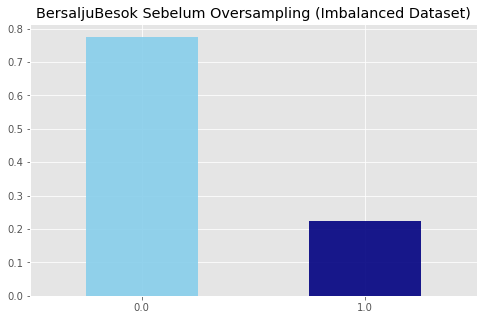

In [26]:
fig = plt.figure(figsize = (8,5))
df_train.BersaljuBesok.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('BersaljuBesok Sebelum Oversampling (Imbalanced Dataset)')
plt.show()

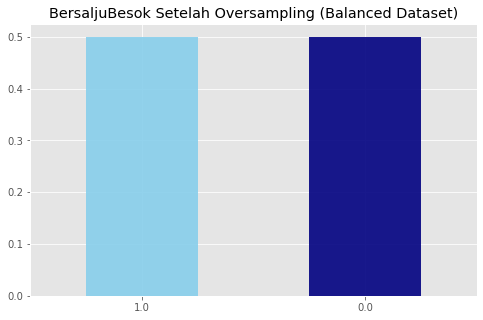

In [27]:
fig = plt.figure(figsize = (8,5))
oversampled.BersaljuBesok.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('BersaljuBesok Setelah Oversampling (Balanced Dataset)')
plt.show()

In [39]:
oversampled.reset_index(drop=True, inplace=True)